In [1]:
import pandas as pd
import numpy as np

In [2]:
insurance_df = pd.read_csv('data-files/insurance.csv', encoding='utf-8')

In [3]:
insurance_df.info()
insurance_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
category_columns = ['sex', 'smoker', 'region']
for c in category_columns:
    # print( insurance_df[c].value_counts() )
    # print( pd.get_dummies(insurance_df[c], drop_first=True, prefix=c, prefix_sep='_') )
    ohe_df = pd.get_dummies(insurance_df[c], drop_first=True, prefix=c, prefix_sep='_')
    insurance_df = insurance_df.merge(ohe_df, left_index=True, right_index=True) # left_index, right_index : 데이터프레임의 index를 사용해서 join할지 결정
    insurance_df.drop(c, axis=1, inplace=True)

In [10]:
insurance_df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [11]:
insurance_df[['age', 'bmi', 'charges']].corr()

,age,bmi,charges
age,1.000000,0.109272,0.299008
bmi,0.109272,1.000000,0.198341
charges,0.299008,0.198341,1.000000


<AxesSubplot:>

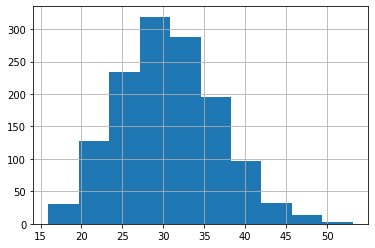

In [12]:
insurance_df['bmi'].hist()

<AxesSubplot:>

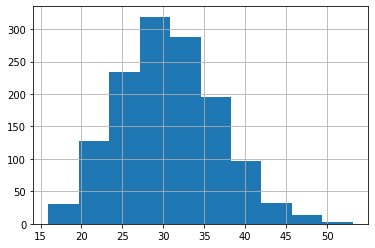

In [13]:
insurance_df['bmi'].hist()

In [14]:
insurance_df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
from sklearn.preprocessing import MinMaxScaler

insurance_df['age'] = MinMaxScaler().fit_transform(insurance_df['age'].values.reshape(-1, 1))
insurance_df['bmi'] = MinMaxScaler().fit_transform(insurance_df['bmi'].values.reshape(-1, 1))
insurance_df['children'] = MinMaxScaler().fit_transform(insurance_df['children'].values.reshape(-1, 1))

In [17]:
insurance_df.describe()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395572,0.218984,13270.422265,0.505232,0.204783,0.242900,0.272048,0.242900
std,0.305434,0.164062,0.241099,12110.011237,0.500160,0.403694,0.428995,0.445181,0.428995
min,0.000000,0.000000,0.000000,1121.873900,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,4740.287150,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.456522,0.388485,0.200000,9382.033000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.717391,0.504002,0.400000,16639.912515,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,63770.428010,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dtype('float64')

In [26]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.7449555328228536, 0.7672642952734355)